# Assignment II: Clustering

In [3]:
import pandas as pd

## Data: Credit Card User Data
For this assignment, we use credit card data from 9000 users. Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [4]:
#get the data
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 101 (delta 2), reused 14 (delta 2), pack-reused 87
Receiving objects: 100% (101/101), 146.44 MiB | 23.88 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Checking out files: 100% (69/69), done.


In [5]:
data = pd.read_csv("DATA/CC GENERAL.csv")

In [6]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Task 1: clean the data and perform a basic EDA
* check for missing values and NAN
* compute basic statistics
* check for carrelations in the data

In [12]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

In [11]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mode())

In [13]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,864.206542,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,2330.588021,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019163,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,170.857654,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,335.628312,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,864.206542,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,76406.207520,50721.483360,76406.207520,1.000000,12.000000


### Task 2: Cluster the creditcard users into sub-groups. Perform a statistical analysis of these groups.
* use a Scikit-Learn clustering *K-Means* and *DBSCAN* clustering to group the users 
* analyze the key differences between the user groups: use simple statistics 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe24d99b810>,
      dtype=object)

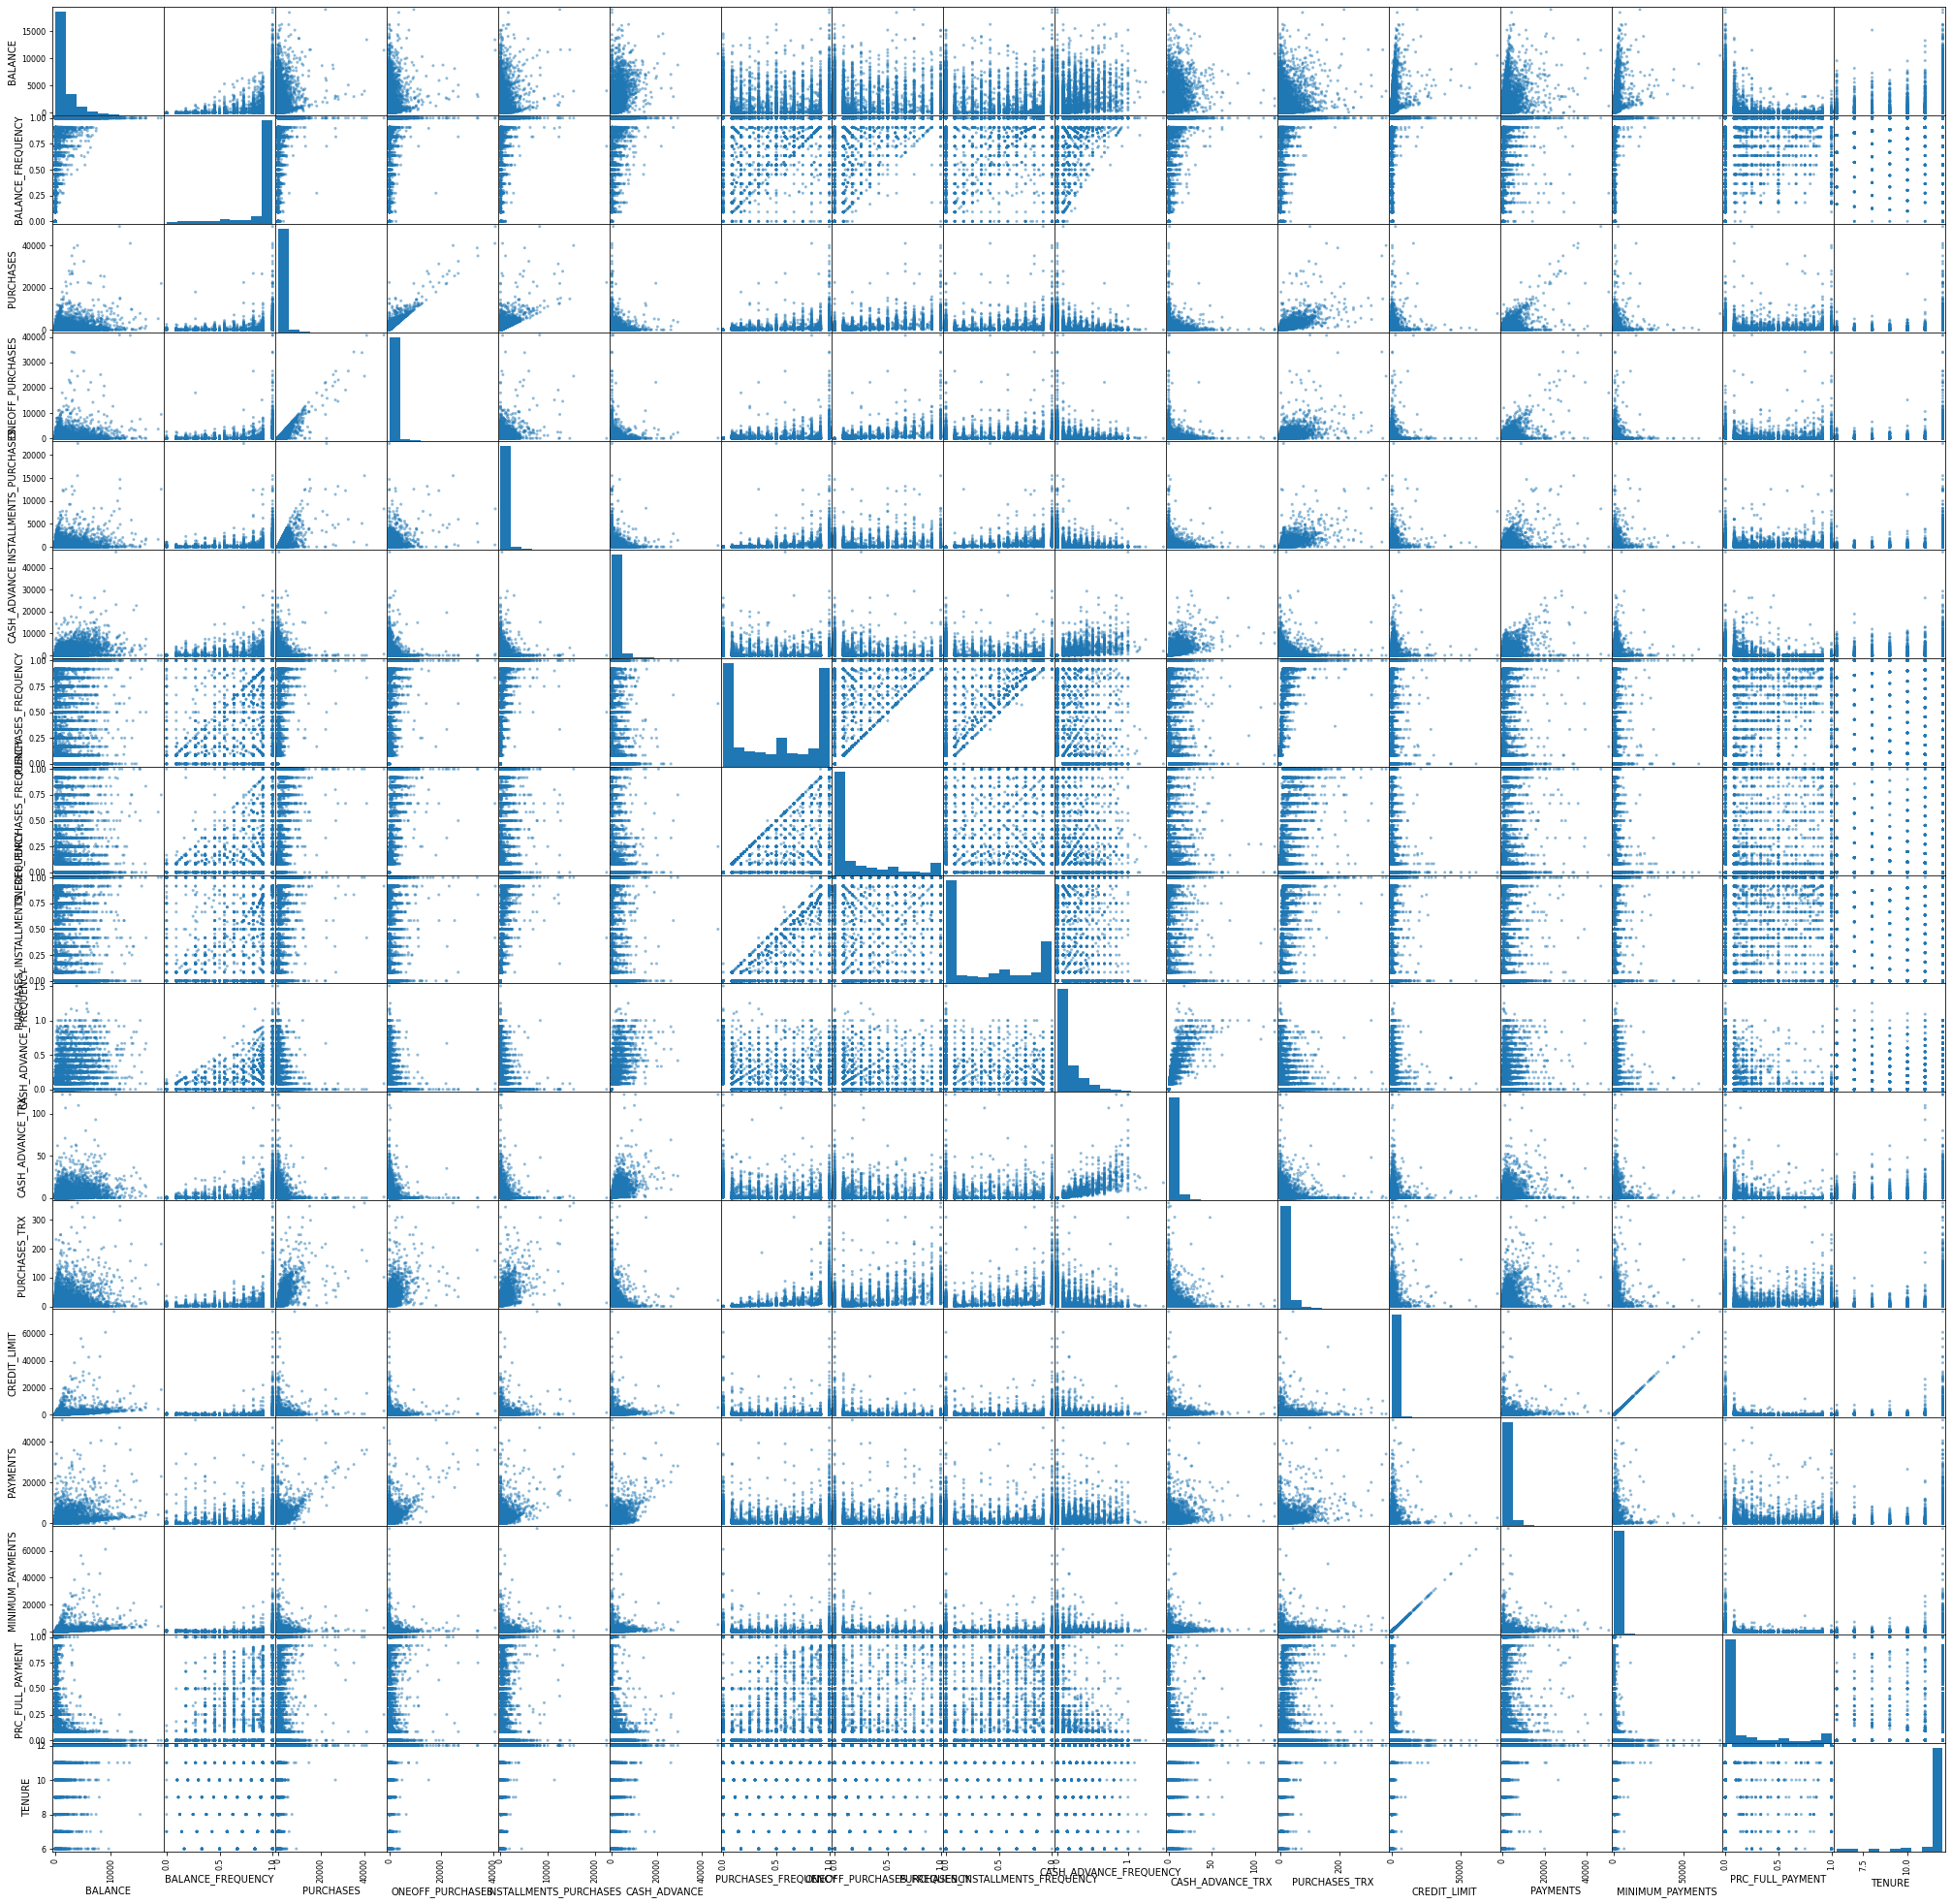

In [25]:
pd.plotting.scatter_matrix(data,0.5,figsize=(35,35))

### The only categorical values here are in CUSTOMER ID , so we will be dropping that column.

In [14]:
data =  data.drop(columns = 'CUST_ID')

In [27]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,139.509787,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,1072.340217,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,627.284787,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,864.206542,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,244.791237,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,48.886365,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,864.206542,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,82.418369,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,55.755628,52.549959,55.755628,0.250000,6


#### Using box plot for observing outliers in data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sc


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage


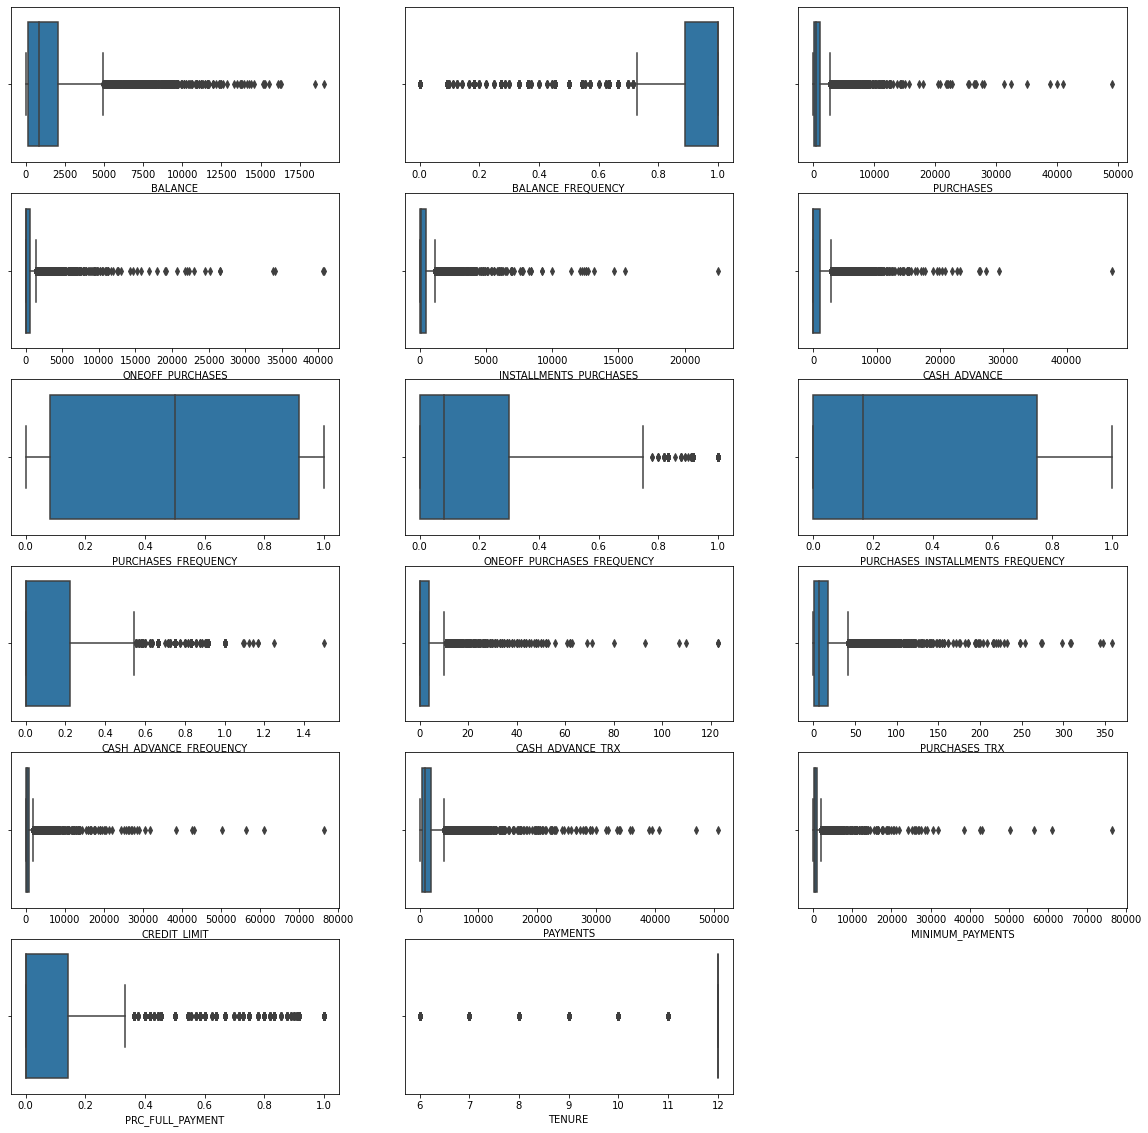

In [32]:
fig = plt.figure(figsize=(20,20))
for col in range(len(data.columns)):
   fig.add_subplot(6,3,col+1)
   sc.boxplot(x=data.iloc[ : , col])
plt.show()
  

#### we will normalize the data

In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape

(8950, 17)

In [17]:
data.shape

(8950, 17)

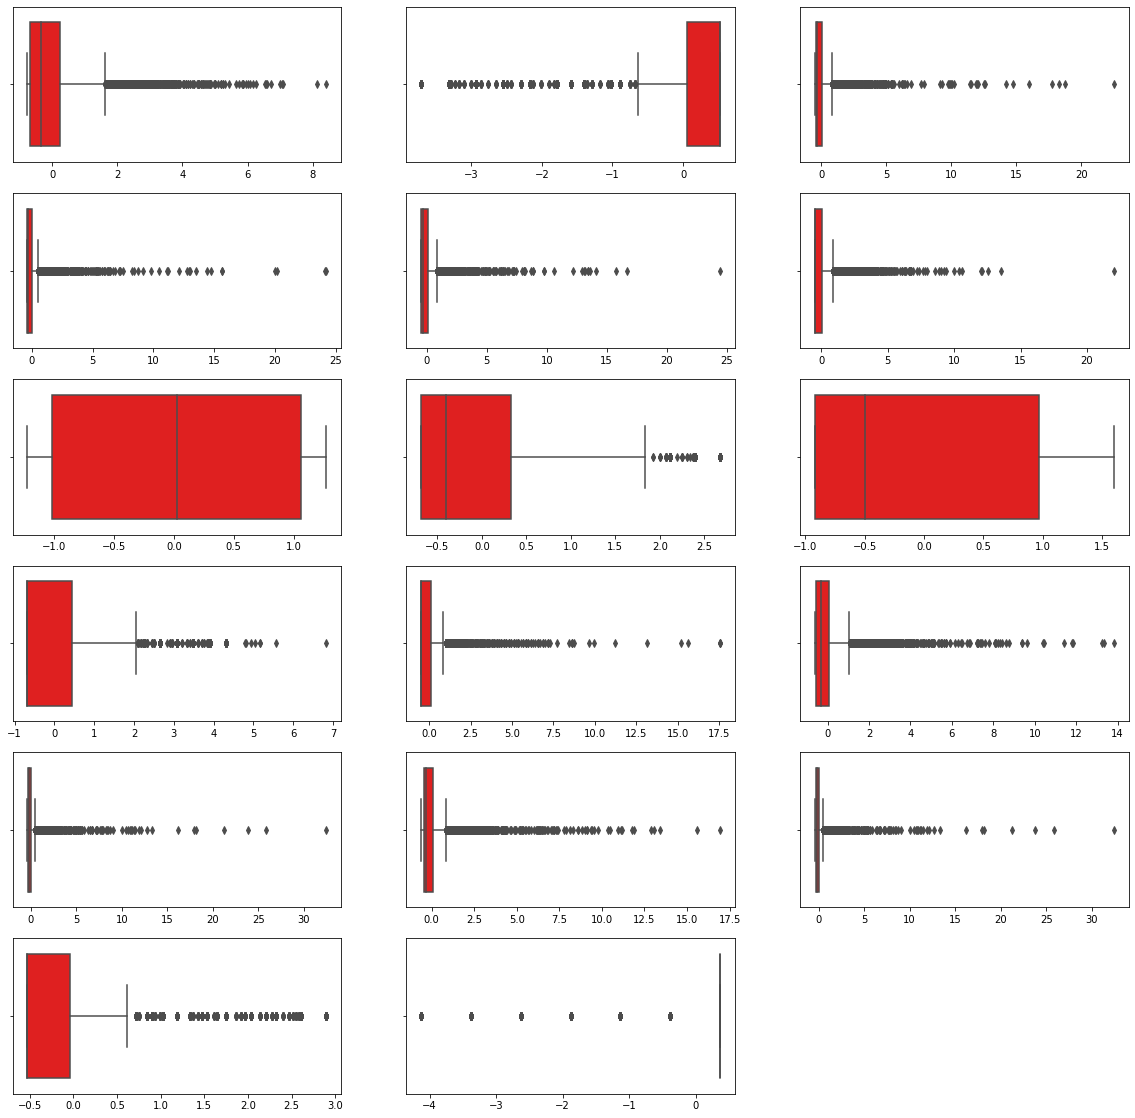

In [49]:
fig = plt.figure(figsize=(20,20))
for col in range(len(data.columns)):
   fig.add_subplot(6,3,col+1)
   sc.boxplot(x=data_scaled[ : , col],color = 'red')
plt.show()


In [75]:
pca = PCA(n_components = 7)  
pca.fit(data_scaled)

x_pca = pca.transform(data_scaled)
x_pca.shape

(8950, 7)

In [18]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
label = km.fit_predict(data_scaled)
label

array([2, 0, 1, ..., 1, 2, 2], dtype=int32)

In [76]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
label1 = km.fit_predict(x_pca)
label1

array([1, 2, 0, ..., 0, 1, 1], dtype=int32)

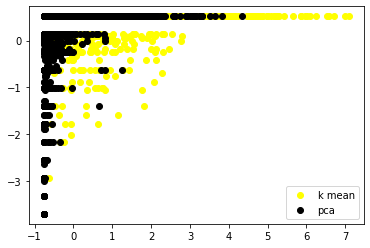

In [77]:
filtered_label0 = data_scaled[label == 0]
filtered_label6 = data_scaled[label1 == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], label='k mean',color = 'yellow')
plt.scatter(filtered_label6[:,0] , filtered_label6[:,1] ,label='pca', color = 'black')
plt.legend()
plt.show()


In [79]:
filtered_label0[:,1]

array([ 0.13432467,  0.51808382,  0.51808382, ..., -0.08496627,
        0.51808382, -0.18547673])

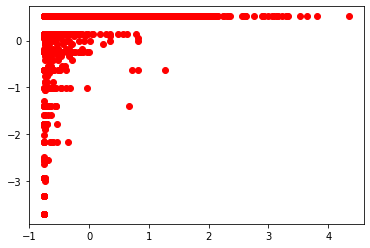

In [39]:
filtered_label1 = data_scaled[label == 1]
 
#plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color= 'red')


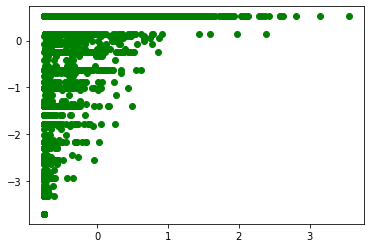

In [40]:
filtered_label2 = data_scaled[label == 2]
 
#plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')


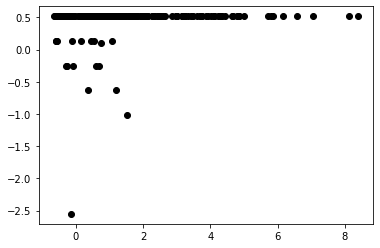

In [41]:
filtered_label3 = data_scaled[label == 3]
 
#plotting the results
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'black')

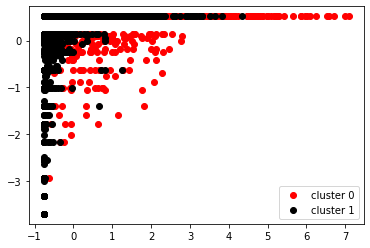

In [43]:
filtered_label0 = data_scaled[label == 0]
 
filtered_label1 = data_scaled[label == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] ,label='cluster 0', color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] ,label='cluster 1', color = 'black')
plt.legend()
plt.show()


In [53]:
print(filtered_label0[0])

filtered_label0.shape


[ 0.78696085  0.13432467 -0.46955188 -0.35693402 -0.45457623  2.60560451
 -1.22175806 -0.67866081 -0.91699519  0.57396272  0.11007385 -0.59179588
  0.08931021  0.81864213  0.08931021  0.2342269   0.36067954]


(1231, 17)

In [54]:
print(filtered_label1[0])

filtered_label1.shape


[ 0.44713513  0.51808382 -0.10766823  0.10888851 -0.45457623 -0.46678555
  1.26984323  2.67345108 -0.91699519 -0.67534886 -0.47606982 -0.10902012
 -0.10166318 -0.38380474 -0.10166318 -0.52555097  0.36067954]


(3422, 17)

In [55]:
print(filtered_label2[0])

filtered_label2.shape


[-0.73198937 -0.24943448 -0.42489974 -0.35693402 -0.34907882 -0.46678555
 -0.80649035 -0.67866081 -0.70731317 -0.67534886 -0.47606982 -0.51133325
 -0.31096755 -0.52897879 -0.31096755 -0.52555097  0.36067954]


(4041, 17)

In [56]:
print(filtered_label3[0])

filtered_label3.shape


[-0.45027722  0.51808382  2.84940849  3.50054795  0.3066639  -0.46678555
  1.26984323  2.67345108  1.59919919 -0.67534886 -0.47606982  1.98300818
 -0.28584111  1.59631326 -0.28584111  2.89345285  0.36067954]


(256, 17)

In [58]:
centroids = km.cluster_centers_

print(centroids)

[[ 1.39465656  0.3875559  -0.2426899  -0.17584298 -0.25087715  1.62592293
  -0.51576439 -0.2302675  -0.45157816  1.74100627  1.60443121 -0.28772807
   0.66674585  0.55747986  0.66674585 -0.4102523  -0.11505795]
 [-0.28076877  0.27372993  0.18715832  0.07336633  0.30749429 -0.35628473
   1.01184353  0.40572877  0.89624774 -0.45169418 -0.35352107  0.3895377
  -0.11817628 -0.08839123 -0.11817628  0.40297787  0.07432082]
 [-0.26552283 -0.37937587 -0.33863395 -0.22859444 -0.38053612 -0.18843481
  -0.77111878 -0.38733162 -0.69045848 -0.1310157  -0.18372341 -0.46928954
  -0.14978286 -0.25755246 -0.14978286 -0.24547014 -0.04882342]
 [ 1.22504163  0.46246871  4.01191082  3.47402232  3.10452933 -0.09623541
   1.13179946  1.79977128  1.09447111 -0.28168566 -0.10400597  3.58628888
   0.73166468  2.5606472   0.73166468  0.46466076  0.33149044]]


In [61]:
y_kmeans = km.predict(data_scaled)

y_kmeans

array([2, 0, 1, ..., 1, 2, 2], dtype=int32)

In [64]:
data['cluster'] = y_kmeans

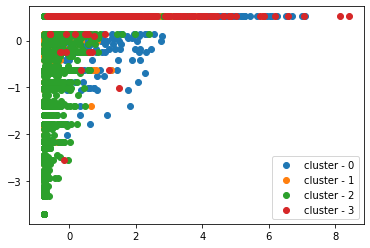

In [44]:
import numpy as np
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data_scaled[label == i , 0] , data_scaled[label == i , 1] , label = f"cluster - {i}")
plt.legend()
plt.show()

In [71]:
print(data.groupby('cluster'))

In [69]:
data =  data.drop(columns = 'y_kmeans')

In [68]:
data.head

<bound method NDFrame.head of           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1      

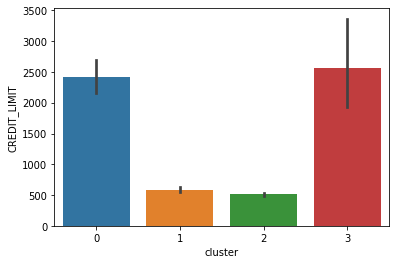

In [73]:
sc.barplot(data = data , x = data['cluster'], y = data['CREDIT_LIMIT'])

In [82]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=3)
y_dbscan = dbscan.fit_predict(data_scaled) #get cluster assignments

In [84]:
y_dbscan
np.unique(y_dbscan)

array([-1,  0,  1,  2,  3,  4,  5])

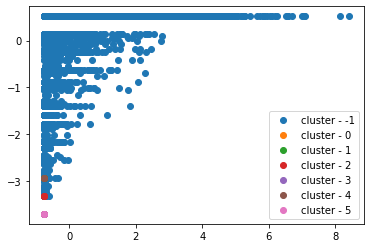

In [85]:
import numpy as np
u_labels = np.unique(y_dbscan)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data_scaled[y_dbscan == i , 0] , data_scaled[y_dbscan == i , 1] , label = f"cluster - {i}")
plt.legend()
plt.show()

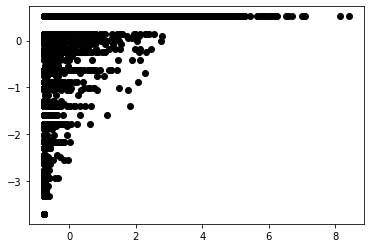

In [86]:
filtered_label0 = data_scaled[y_dbscan == -1]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'black')

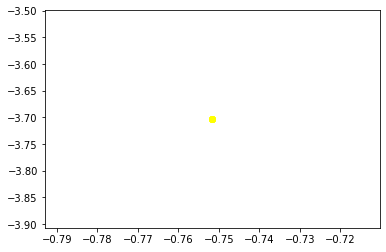

In [88]:
filtered_label1 = data_scaled[y_dbscan == 0]
 
#plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'yellow')